In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import f1_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from zero_shot_models.cgpt import read_data

from pathlib import Path

In [3]:
# get a list of all csv files in the results folder
results_dir = './'
results_files = [os.path.join(results_dir, f) for f in os.listdir(results_dir) if f.endswith('.csv')]

In [4]:
results_files

['./test_cgpt_all_results.csv',
 './test_nli_results_binary.csv',
 './few_shot_cgpt_valid_results.csv',
 './test_transformer_results.csv',
 './few_shot_4x_cgpt_test_results.csv',
 './valid_transformer_results_binary_context.csv',
 './train_cgpt_binary_context_p2.csv',
 './valid_sentransformer_results.csv',
 './few_shot_4x_cgpt_valid_results.csv',
 './test_transformer_results_binary_context.csv',
 './test_sentransformer_results.csv',
 './valid_cgpt_binary_context.csv',
 './test_sentransformer_results_binary_context.csv',
 './test_nli_results.csv',
 './test_transformer_results_binary.csv',
 './valid_nli_results_binary.csv',
 './valid_nli_results_binary_context.csv',
 './few_shot_cgpt_test_results.csv',
 './test_sentransformer_results_binary.csv',
 './valid_cgpt_binary.csv',
 './valid_sentransformer_results_binary_context.csv',
 './valid_transformer_results.csv',
 './train_cgpt_binary_context.csv',
 './test_nli_results_binary_context.csv',
 './test_cgpt_binary.csv',
 './valid_sentransform

In [5]:
train = read_data("../data/liar_dataset/train.tsv")
valid = read_data("../data/liar_dataset/valid.tsv")
test = read_data("../data/liar_dataset/test.tsv")

In [6]:
labels_map = {'pants-fire': "false", 'false':"false", 'barely-true':"false", 'half-true':"false", 'mostly-true':"true", 'true':"true"}

# Get the true labels

In [7]:
valid_true = valid['label']
valid_true_binary = valid['label'].map(labels_map)

test_true = test['label']
test_true_binary = test['label'].map(labels_map)

In [8]:
! ls ../

data           data_table.txt papers         src


In [9]:
figs = Path("figs/")

In [119]:
# Set the plottingstyle to presentation
sns.set_context("paper", font_scale=1.75, rc={"lines.linewidth": 2.5})

/Users/viktortorpthomsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


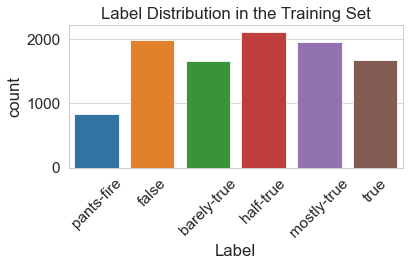

/Users/viktortorpthomsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


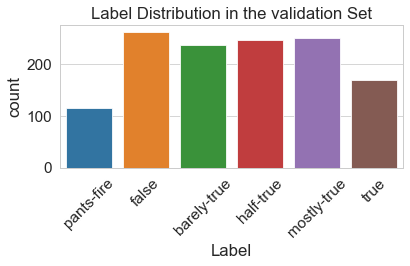

/Users/viktortorpthomsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


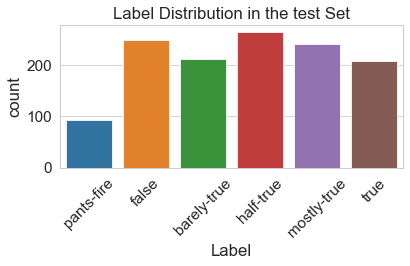

In [133]:
labels = list(labels_map.keys())

# plot the label distribution with seaborn  
sns.countplot(train.label, order=labels)
plt.xlabel('Label')
#rotate xticks
plt.xticks(rotation=45)
plt.title('Label Distribution in the Training Set')
plt.tight_layout()
plt.savefig(figs / 'training_label_distribution.png')
plt.show()

# plot the label distribution with seaborn  
sns.countplot(valid.label, order=labels)
plt.xlabel('Label')
plt.xticks(rotation=45)

plt.title('Label Distribution in the validation Set')
plt.tight_layout()
plt.savefig(figs / 'valid_label_distribution.png')
plt.show()


sns.countplot(test.label, order=labels)
plt.xlabel('Label')
plt.xticks(rotation=45)

plt.title('Label Distribution in the test Set')
plt.tight_layout()
plt.savefig(figs / 'test_label_distribution.png')
plt.show()


/Users/viktortorpthomsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


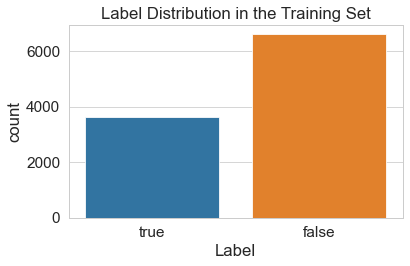

/Users/viktortorpthomsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


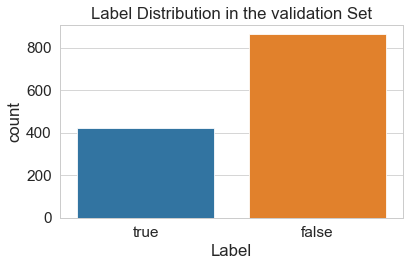

/Users/viktortorpthomsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


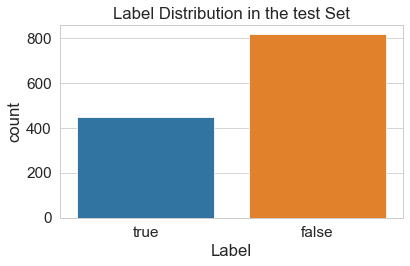

In [134]:
labels_binary = ["true", "false"]

# plot the label distribution with seaborn  
sns.countplot(train.label.map(labels_map), order=labels_binary)
plt.xlabel('Label')
plt.title('Label Distribution in the Training Set')
plt.tight_layout()
plt.savefig(figs / 'training_binary_label_distribution.png')
plt.show()

# plot the label distribution with seaborn  
sns.countplot(valid.label.map(labels_map), order=labels_binary)
plt.xlabel('Label')
plt.title('Label Distribution in the validation Set')
plt.tight_layout()
plt.savefig(figs / 'valid_binary_label_distribution.png')
plt.show()


sns.countplot(test.label.map(labels_map), order=labels_binary)
plt.xlabel('Label')
plt.title('Label Distribution in the test Set')
plt.tight_layout()
plt.savefig(figs / 'test_binary_label_distribution.png')
plt.show()


# Models from other papers accuracy

In [53]:
old_models = {"HybridCNN": 0.274, "AENeT": 0.4636}

In [54]:
old_models_binary = {"SentLIAR": 0.70}

# Baselines

In [55]:
# Random baseline for valid set
rb_valid_pred_binary = np.random.choice(['true', 'false'], size=len(valid_true))
rb_valid_pred = np.random.choice(valid_true.unique(), size=len(valid_true))

# Random baseline for test set
rb_test_pred_binary = np.random.choice(['true', 'false'], size=len(test_true))
rb_test_pred = np.random.choice(test_true.unique(), size=len(test_true))

# Most frequent label in train
train_most_freq = train['label'].value_counts().index[0]
valid_pred_most_freq = np.repeat(train_most_freq, len(valid_true))
test_pred_most_freq = np.repeat(train_most_freq, len(test_true))
train_most_freq_binary = train['label'].map(labels_map).value_counts().index[0]
valid_pred_most_freq_binary = np.repeat(train_most_freq_binary, len(valid_true))
test_pred_most_freq_binary = np.repeat(train_most_freq_binary, len(test_true))

## Baseline performances

In [56]:
# Get accuracy score for the baselines on the test set
random_baseline_test_acc = accuracy_score(test_true, rb_test_pred)
majority_baseline_test_acc = accuracy_score(test_true, test_pred_most_freq)

baseline_results = {"Random Baseline": random_baseline_test_acc, "Majority Baseline": majority_baseline_test_acc}


# Get accuracy score for the baselines on the test set
random_baseline_test_acc_binary = accuracy_score(test_true_binary, rb_test_pred_binary)
majority_baseline_test_acc_binary = accuracy_score(test_true_binary, test_pred_most_freq_binary)

baseline_results_binary = {"Random Baseline": random_baseline_test_acc_binary, "Majority Baseline": majority_baseline_test_acc_binary}

In [57]:
baseline_results_binary, baseline_results

({'Random Baseline': 0.48145224940805054,
  'Majority Baseline': 0.6456195737963694},
 {'Random Baseline': 0.15469613259668508,
  'Majority Baseline': 0.2091554853985793})

# zero- and few- shot results

In [58]:
models = ['./test_cgpt_all_results.csv',  "./test_nli_results.csv", "./test_sentransformer_results.csv"]
model_names = ["GPT-3", "Entailment" , "ST"]
model_results = {}
for model, model_name in zip(models, model_names):
    preds = pd.read_csv(model)["prediction"]
    preds = [str(p).lower() for p in preds]
    acc = accuracy_score(test_true, preds)
    model_results.update({model_name: acc})
model_results

{'GPT-3': 0.23441199684293607,
 'Entailment': 0.1894238358326756,
 'ST': 0.1957379636937648}

In [59]:
baseline_results

{'Random Baseline': 0.15469613259668508,
 'Majority Baseline': 0.2091554853985793}

In [60]:
old_models

{'HybridCNN': 0.274, 'AENeT': 0.4636}

In [61]:
all_results = {**model_results, **baseline_results, **old_models}
all_results

{'GPT-3': 0.23441199684293607,
 'Entailment': 0.1894238358326756,
 'ST': 0.1957379636937648,
 'Random Baseline': 0.15469613259668508,
 'Majority Baseline': 0.2091554853985793,
 'HybridCNN': 0.274,
 'AENeT': 0.4636}

In [62]:
models = ['./test_cgpt_binary.csv', './test_cgpt_binary_context.csv','./few_shot_cgpt_test_results.csv', "./test_nli_results_binary.csv", "./test_nli_results_binary_context.csv", "./test_sentransformer_results_binary.csv", "./test_transformer_results_binary_context.csv"]
model_names = ["GPT-3", "GPT-3 w. context", "GPT-3 few-shot", "Entailment" , "Entailment w. context", "ST", "ST w. context"]
model_results_binary = {}
for model, model_name in zip(models, model_names):
    preds = pd.read_csv(model)["prediction"]
    preds = [str(p).lower() for p in preds]
    acc = accuracy_score(test_true_binary, preds)
    model_results_binary.update({model_name: acc})
model_results_binary

{'GPT-3': 0.5966850828729282,
 'GPT-3 w. context': 0.6685082872928176,
 'GPT-3 few-shot': 0.6416732438831886,
 'Entailment': 0.6029992107340174,
 'Entailment w. context': 0.6282557221783741,
 'ST': 0.5359116022099447,
 'ST w. context': 0.4577742699289661}

In [63]:
model_results_binary.update({"SetFit": 0.5043})

In [64]:
all_results_binary = {**model_results_binary, **baseline_results_binary, **old_models_binary}

In [65]:
all_results_binary

{'GPT-3': 0.5966850828729282,
 'GPT-3 w. context': 0.6685082872928176,
 'GPT-3 few-shot': 0.6416732438831886,
 'Entailment': 0.6029992107340174,
 'Entailment w. context': 0.6282557221783741,
 'ST': 0.5359116022099447,
 'ST w. context': 0.4577742699289661,
 'SetFit': 0.5043,
 'Random Baseline': 0.48145224940805054,
 'Majority Baseline': 0.6456195737963694,
 'SentLIAR': 0.7}

# Plot the results

In [142]:
model_type = {'GPT-3':"Zero-shot model", 'Entailment':"Zero-shot model", 'ST':"Zero-shot model", 'Random Baseline':"Baseline", 'Majority Baseline':"Baseline", 'HybridCNN':"Other model", 'AENeT':"Other model"}

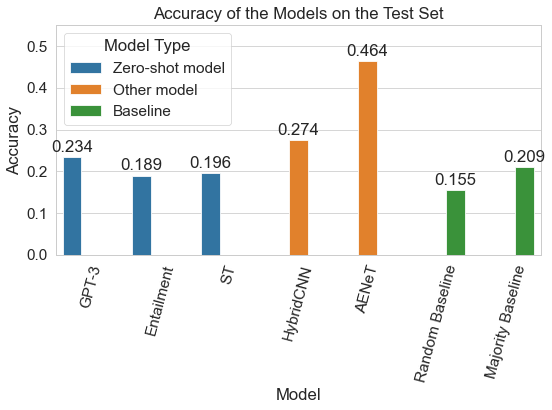

In [143]:
fig, ax = plt.subplots(figsize=(8, 6))
# Plot all results with sns and add the model type as hue
df = pd.DataFrame.from_dict(all_results, orient='index', columns=['Accuracy'])
df['Model Type'] = df.index.map(model_type)
df = df.reset_index()
df = df.rename(columns={'index': 'Model'})
df = df.sort_values(by='Model Type', ascending=False)

# Plot df with seaborn
sns.barplot(x='Model', y='Accuracy', hue='Model Type', data=df)
# Add values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.xticks(rotation=75)
plt.ylim(0, 0.55)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of the Models on the Test Set')
plt.tight_layout()
# hide the legend
plt.savefig(figs / 'test_set_results.png')

In [137]:
model_type = {'GPT-3':"Zero-/few-shot model", 'GPT-3 w. context':"Zero-/few-shot model", 'GPT-3 few-shot':"Zero-/few-shot model", 'Entailment':"Zero-/few-shot model", 'Entailment w. context':"Zero-/few-shot model", 'ST':"Zero-/few-shot model", 'ST w. context':"Zero-/few-shot model", 'SetFit':"Zero-/few-shot model", 'Random Baseline':"Baseline", 'Majority Baseline':"Baseline", 'SentLIAR':"Other model"}

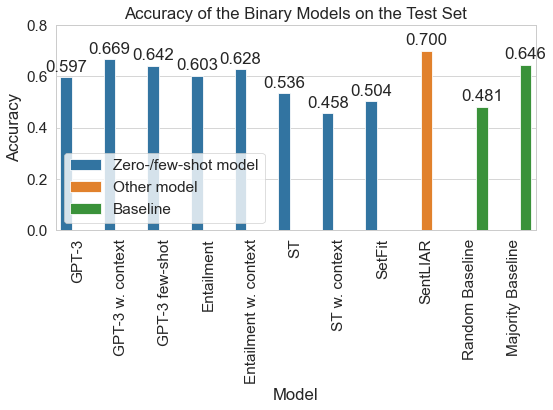

In [138]:
fig, ax = plt.subplots(figsize=(8, 6))
# Plot all results with sns and add the model type as hue
df = pd.DataFrame.from_dict(all_results_binary, orient='index', columns=['Accuracy'])
df['Model Type'] = df.index.map(model_type)
df = df.reset_index()
df = df.rename(columns={'index': 'Model'})
df = df.sort_values(by='Model Type', ascending=False)

# Plot df with seaborn
sns.barplot(x='Model', y='Accuracy', hue='Model Type', data=df)
# Add values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy')
# set axis limits
plt.ylim(0, 0.8)
# Set legend in lower left corner
plt.legend(loc='lower left')
plt.title('Accuracy of the Binary Models on the Test Set')
plt.tight_layout()
plt.savefig(figs / 'test_set_results_binary.png')

# Abstinations

In [145]:
models = ['./test_cgpt_all_results.csv', './test_cgpt_binary.csv', './test_cgpt_binary_context.csv','./few_shot_cgpt_test_results.csv']
model_names = ["GPT-3", "GPT-3 binary", "GPT-3 w. context", "GPT-3 few-shot"]
for model, model_name in zip(models, model_names):
    print(model_name)
    preds = pd.read_csv(model)
    preds["prediction"] = preds["prediction"].apply(lambda x: str(x).lower())
    preds["label"] = preds["label"].apply(lambda x: str(x).lower())
    preds_lower = [str(p).lower() for p in preds["prediction"]]
    
    print(pd.Series(preds_lower).value_counts())

    try:
        display(preds.loc[preds.prediction == "abstain"][["label", "prediction", "statement", "explanation"]])
    except:
        pass
    # print value counts for each model
    if model_name == "GPT-3": 
        display(preds.loc[preds.label.str.lower() == preds.prediction.str.lower()].sample(5)[["label", "prediction", "statement", "explanation"]])
        display(preds.loc[preds.label.str.lower() != preds.prediction.str.lower()].sample(5)[["label", "prediction", "statement", "explanation"]])
    elif model_name != "GPT-3 few-shot":
        display(preds.loc[preds.label == preds.prediction].sample(5)[["label", "prediction", "statement", "explanation"]])
        display(preds.loc[preds.label != preds.prediction].sample(5)[["label", "prediction", "statement", "explanation"]])
    else:
        display(preds.loc[preds.label == preds.prediction].sample(5)[["label", "prediction", "statement"]])
        display(preds.loc[preds.label != preds.prediction].sample(5)[["label", "prediction", "statement"]])
        

    print("="*20)


GPT-3
mostly-true      847
false            358
true              42
half-true         12
pants on fire      5
abstain            2
barely-true        1
dtype: int64


,label,prediction,statement,explanation
32,half-true,abstain,On which team hes rooting for in the World Series.,Unanswerable because the statement does not provide enough information to accurately classify its accuracy.
142,mostly-true,abstain,"The sex-offender registry has been around for a long time, and the research thats out there says that it has no positive impact on the public safety.","The research available does not support the idea that the sex-offender registry has a positive impact on public safety, but it has been around for a long time."


,label,prediction,statement,explanation
488,mostly-true,mostly-true,"First, he was in favor of my plan, now he's attacking it.",The statement is mostly accurate as it implies that the person in question has changed their opinion on the plan from being in favor to attacking it.
631,true,true,"George Bush ... used a signing statement (on a FEMA bill) to say, 'I don't have to follow that, unless I choose to.'","The statement is accurate, as George W. Bush did use a signing statement to say he didn't have to follow the FEMA bill unless he chose to."
599,false,false,Says Ron Johnson helped companies ship jobs overseas.,There is no evidence to support this statement.
916,mostly-true,mostly-true,"The Obama administration is using as its legal justification for these airstrikes (on the Islamic State), an authorization for military force that the president himself has called for repeal of.",The Obama administration is using an authorization for military force that the president has called for repeal of as its legal justification for airstrikes on the Islamic State.
151,mostly-true,mostly-true,Eighty percent of the American people support an approach (to federal budget problems) that includes revenues and includes cuts.,"The statement is likely accurate, but it is impossible to know the exact percentage of Americans who support the approach."


,label,prediction,statement,explanation
511,pants-fire,mostly-true,Jules Bailey was instrumental in creating the Business Energy Tax Credit that let companies like Wal-Mart profit by $11 million while costing the Oregon general fund $33 million.,"The statement is mostly accurate, with the exception of Wal-Mart's exact profit amount from the Business Energy Tax Credit."
97,false,half-true,Half of children struck by cars near schools are hit by parents driving children to school.,"The statement is partially true, as half of children struck by cars near schools may be hit by parents driving children to school. However, the statement does not account for other factors such as other drivers or pedestrians that may contribute to the number of children hit by cars near schools."
124,false,mostly-true,On an income cap for recipients of the popular HOPE scholarship,"The statement is mostly true, as the HOPE scholarship does have an income cap for recipients."
967,half-true,mostly-true,"In Hillary Clintons tax returns, you saw a lot of income coming from donors to the Clinton Foundation and people who benefitted from her State Department term as well.","The statement is mostly accurate, but it is not the only source of income found in Hillary Clinton's tax returns."
126,half-true,mostly-true,On running a civil and polite campaign.,"The statement is generally accurate, as running a civil and polite campaign would be expected of most candidates."


GPT-3 binary
true         662
false        589
abstain       15
half-true      1
dtype: int64


,label,prediction,statement,explanation
14,false,abstain,On residency requirements for public workers,"Without more information, it is not possible to determine the accuracy of this statement."
20,true,abstain,There have not been any public safety issues in cities that allow transgender people to use the bathroom of the gender they identify as.,The accuracy of the statement cannot be determined due to a lack of evidence.
32,false,abstain,On which team hes rooting for in the World Series.,This statement does not make a claim that can be assessed for accuracy.
151,true,abstain,Eighty percent of the American people support an approach (to federal budget problems) that includes revenues and includes cuts.,The accuracy of the statement cannot be determined without further evidence.
154,false,abstain,On pay for fired Milwaukee police officers,The accuracy of the statement cannot be determined without more information.
295,false,abstain,On whether the government should bail out insurance giant AIG.,"The statement is an opinion, not a fact, and therefore cannot be classified as either true or false."
459,false,abstain,On redistricting.,It is difficult to classify the accuracy of this statement without more information.
726,false,abstain,Metro on whether it could use bond money for restoration.,It is not possible to classify the accuracy of this statement without additional context.
840,false,abstain,Ohioans want an end to pay-to-play politics.,The accuracy of this statement cannot be determined without further evidence.
852,false,abstain,On subsidies for ethanol production.,The accuracy of the statement cannot be determined without further context.


,label,prediction,statement,explanation
1105,false,false,"Says Milwaukee County Executive Chris Abele spent $100,000 of taxpayer money on a new luxury SUV.","Chris Abele did not spend $100,000 of taxpayer money on a new luxury SUV."
23,true,true,Marijuana is less toxic than alcohol.,"Marijuana is not toxic and does not cause any long-term damage to the body, unlike alcohol which can lead to liver and other organ damage."
663,true,true,"Were spending less money today, in upcoming fiscal year 2014 than the Corzine-Buono budget spent in fiscal year 2008.","The Corzine-Buono budget for fiscal year 2008 was $33.5 billion, while the proposed budget for fiscal year 2014 is $32.7 billion, which is less than the amount spent in 2008."
950,true,true,"With the exception of baby formula, the federal government does not require any food to carry an expiration date, and state laws vary widely.","The statement is accurate as the federal government does not require any food, with the exception of baby formula, to carry an expiration date, and state laws do vary widely."
322,false,false,"Onion Creeks highest flow rate on a recent night of flooding was 120,000 cubic feet per second, which is nearly double the average flow rate of Niagara Falls.","The average flow rate of Niagara Falls is actually much higher than 120,000 cubic feet per second."


,label,prediction,statement,explanation
841,true,false,We are the only industrialized nation that doesnt guarantee workers paid family leave.,"Other industrialized nations such as Japan, the United Kingdom, and Canada all guarantee paid family leave."
380,false,true,You had supported John McCain's military strategies pretty adamantly until this race.,The statement accurately describes a past action taken by the subject.
51,false,true,Hillary Clinton said gun confiscation would be worth considering.,Hillary Clinton did say that gun confiscation would be worth considering.
195,false,true,"Since the first of the year, 153 businesses at last count had moved out of California to Texas.",The statement is accurate as it provides an exact number of businesses that have moved out of California to Texas since the beginning of the year.
819,true,false,"The United States of America, right now, has the strongest, most durable economy in the world.","The United States has one of the strongest economies in the world, but there are other countries with larger and more durable economies."


GPT-3 w. context
false    972
true     295
dtype: int64


,label,prediction,statement,explanation


,label,prediction,statement,explanation
1243,false,false,"In 2004, ""20 percent of U.S. households were getting about 75 percent of their income from the federal government. ... Another 20 percent were receiving almost 40 percent.""","This statement is false. Paul Ryan made this claim in a speech to the Oklahoma Council of Public Affairs in 2004, but it was not true. According to the U.S. Census Bureau, in 2004 only 8 percent of households were receiving 75 percent or more of their income from the federal government, and only 11 percent were receiving 40 percent or more."
717,false,false,"Says Donald Trumps conversion to pro-life beliefs are akin to Justin Biebers, who said in the past that abortion was no big deal to him.",Sarah Palin is not a reliable source to comment on Donald Trump's conversion to pro-life beliefs or Justin Bieber's views on abortion.
348,false,false,A bill by Earl Blumenauer would mandate GPS tracking devices on all our vehicles.,The speaker's job title has no bearing on the validity of the statement.
835,true,true,Nine million people have lower-cost HIV/AIDS medicine because of the work of the Clinton Foundation and my husband.,"The statement is true, as the Clinton Foundation has been a major advocate for providing lower-cost HIV/AIDS medicine to people in need."
765,false,false,Congressman Joe Heck has (voted) 62% of the time with Nancy Pelosi and the Democrats on a variety of important issues.,"Congressman Joe Heck is a Republican nominee for Nevada U.S. Senate seat, and thus would not have voted with Nancy Pelosi and the Democrats on any issues."


,label,prediction,statement,explanation
810,true,false,"By some estimates, as few as 2 percent of the 50,000 (Central American) children who have crossed the border illegally this year have been sent home.",This statement is not supported by any evidence and is therefore false.
1108,true,false,Says he had to impose tougher cost controls on state employees than any previous Wisconsin governor.,"Jim Doyle was the governor of Wisconsin, not a lawyer."
868,true,false,"In 2012, Wall Street gave Scott Brown more campaign contributions than any other candidate -- $5.3 million.","Jeanne Shaheen was not a Senator in 2012, so the statement is not applicable to her."
157,true,false,"Today, if you were raised poor, youre just as likely to stay poor as you were 50 years ago.","Paul Ryan is a U.S. Representative and not an expert on families, income, poverty or economics. Therefore, his statement cannot be considered valid."
287,true,false,It is already in the law that there is a requirement to screen (refugees) for religion.,"Jeb Bush did not make this statement during an interview on ""Face the Nation""."


GPT-3 few-shot
false    828
true     439
dtype: int64


,label,prediction,statement
19,false,false,Ronald Reagan faced an even worse recession than the current one.
421,true,true,The U.S. doesnt make television sets anymore.
1215,false,false,"Like me, Scott Walker opposed the 1998 transportation bill and the $9 billion of wasteful spending."
717,false,false,"Says Donald Trumps conversion to pro-life beliefs are akin to Justin Biebers, who said in the past that abortion was no big deal to him."
1207,true,true,Says President John F. Kennedy released a star Green Bay Packer from military reserve duty so that he could play in the 1961 NFL Championship Game.


,label,prediction,statement
4,pants-fire,false,"When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes."
301,barely-true,true,Florida is investing record amounts of funding for HIV/AIDS prevention.
326,false,true,"Says the estate tax, in many cases, forces family farmers and small businesses owners to sell their holdings."
207,mostly-true,true,"Says 315,000 mostly minority Texas students are enrolled in failing schools."
805,false,true,Says Wisconsin women facing pay discrimination cant do something about it under bill passed by Republicans.


In [90]:
bdf = pd.read_csv('./test_cgpt_binary.csv')

In [92]:
# show all the text from from pd columns
pd.set_option('display.max_colwidth', None)

In [93]:
bdf.loc[bdf.prediction == "abstain"][["label", "prediction", "statement", "explanation"]]

,label,prediction,statement,explanation
14,False,abstain,On residency requirements for public workers,"Without more information, it is not possible to determine the accuracy of this statement."
20,True,abstain,There have not been any public safety issues in cities that allow transgender people to use the bathroom of the gender they identify as.,The accuracy of the statement cannot be determined due to a lack of evidence.
32,False,abstain,On which team hes rooting for in the World Series.,This statement does not make a claim that can be assessed for accuracy.
151,True,abstain,Eighty percent of the American people support an approach (to federal budget problems) that includes revenues and includes cuts.,The accuracy of the statement cannot be determined without further evidence.
154,False,abstain,On pay for fired Milwaukee police officers,The accuracy of the statement cannot be determined without more information.
295,False,abstain,On whether the government should bail out insurance giant AIG.,"The statement is an opinion, not a fact, and therefore cannot be classified as either true or false."
459,False,abstain,On redistricting.,It is difficult to classify the accuracy of this statement without more information.
726,False,abstain,Metro on whether it could use bond money for restoration.,It is not possible to classify the accuracy of this statement without additional context.
840,False,abstain,Ohioans want an end to pay-to-play politics.,The accuracy of this statement cannot be determined without further evidence.
852,False,abstain,On subsidies for ethanol production.,The accuracy of the statement cannot be determined without further context.


# Error analysis

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1267 non-null   int64  
 1   id                   1267 non-null   object 
 2   label                1267 non-null   bool   
 3   statement            1267 non-null   object 
 4   subject              1267 non-null   object 
 5   speaker              1267 non-null   object 
 6   speaker_job          942 non-null    object 
 7   state_info           1005 non-null   object 
 8   party                1267 non-null   object 
 9   barely_true_count    1267 non-null   int64  
 10  false_count          1267 non-null   int64  
 11  half_true_count      1267 non-null   int64  
 12  mostly_true_count    1267 non-null   int64  
 13  pants_on_fire_count  1267 non-null   int64  
 14  context              1250 non-null   object 
 15  token_count          1267 non-null   i

In [76]:
df.party.value_counts()

republican             571
democrat               406
none                   214
organization            27
independent             14
journalist               9
columnist                7
libertarian              5
state-official           4
talk-show-host           3
activist                 2
business-leader          1
government-body          1
newsmaker                1
county-commissioner      1
constitution-party       1
Name: party, dtype: int64

In [77]:
df.speaker.value_counts()

barack-obama        62
donald-trump        33
hillary-clinton     31
rick-scott          21
john-mccain         21
                    ..
afscme               1
jonathan-karl        1
dan-sebring          1
matt-lundy           1
john-burzichelli     1
Name: speaker, Length: 636, dtype: int64

In [78]:
df.speaker_job.value_counts()

President                                           62
Governor                                            55
U.S. Senator                                        55
U.S. senator                                        36
President-Elect                                     33
                                                    ..
Retired firefighter                                  1
Hip hop artist                                       1
Adviser to President Barack Obama                    1
New York Times columnist                             1
senior fellow, Foreign Policy Research Institute     1
Name: speaker_job, Length: 303, dtype: int64

In [79]:
df.subject.value_counts()

health-care                                                       40
elections                                                         31
education                                                         30
candidates-biography                                              30
economy                                                           21
                                                                  ..
economy,energy,environment,jobs                                    1
civil-rights,crime,foreign-policy,homeland-security,technology     1
economy,federal-budget,stimulus,taxes                              1
debates,elections                                                  1
environment,government-efficiency                                  1
Name: subject, Length: 732, dtype: int64